In [17]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__( # task0
            self,
            trends_df_path: str="data/RUvideos_short.csv",
            categories_df_path: str="data/RU_category_id.json"
    ):
        self.trends_df = pd.read_csv(trends_df_path)
        self.trends_df.trending_date = pd.to_datetime(self.trends_df.trending_date,
                                                      format='%y.%d.%m', dayfirst=True)
        self.trends_df.trending_date = self.trends_df.trending_date.dt.day

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)

        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                 'name': item['snippet']['title']},
                ignore_index=True
            )

        self.categories_df['id'] = self.categories_df['id'].astype(int)

    def task1(self) -> pd.DataFrame:
        self.merged = self.trends_df.merge(self.categories_df, left_on='category_id', right_on='id')
        return self.merged

    def task2(self) -> pd.DataFrame:
        self.pivot_table = pd.pivot_table(self.merged, index='name', columns='trending_date',
                                          values='views', aggfunc=np.sum)
        return self.pivot_table

    def task3(self) -> Figure:
        tmp = self.pivot_table.apply(lambda x: x / 1e6)

        sns.heatmap(tmp, annot=True)
        plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã')
        return plt.gcf()

    def task4(self) -> pd.DataFrame:
        self.pivot_table.loc[:, '–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤'] = self.pivot_table.sum(axis=1)
        self.pivot_table.loc['–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤', :] = self.pivot_table.sum(axis=0)
        return self.pivot_table

    def task5(self) -> Figure:
        tmp = self.pivot_table.apply(lambda x: x / 1e6)

        sns.heatmap(tmp, annot=True, vmin=-5, vmax=10)
        plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–æ–ø–æ–ª–Ω–µ–Ω–Ω–æ–π —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã')
        plt.xlabel('–î–∞—Ç–∞')
        plt.ylabel('–ñ–∞–Ω—Ä')
        return plt.gcf()

In [18]:
hosting = YouTube2()
hosting.trends_df.head()

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

video_id  trending_date                                  title  \
0  gDuslQ9avLc             14        –ó–∞—Ö–∞—Ä –∏ –ü–æ–ª–∏–Ω–∞ —É—á–∞—Ç—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å   
1  AOCJIFEA_jE             14       –ë–∏—Ä–∂–∞ –ú–µ–º–æ–≤ #29. –ë–æ–ª—å—à–æ–∏ÃÜ –≤—ã–ø—É—Å–∫   
2  VAWNQDgwwOM             14           –•–ê–ô–ü –ö–≠–ú–ü - –°–í–û–ô –°–†–ï–î–ò –ß–£–ñ–ò–•   
3  gknkFwKQfHg             14             –°–æ—á–Ω–∞—è –∫–µ—Å–∞–¥–∏–ª—å—è —Å –∫—É—Ä–∏—Ü–µ–π   
4  3sYvZcwzZr8             14  –ö–õ–ò–ü–´ –†–û–î–ò–¢–ï–õ–ï–ô –ù–ê –®–ö–û–õ–¨–ù–´–ô –í–´–ü–£–°–ö–ù–û–ô   

  channel_title  category_id              publish_time  \
0     –¢‚Äî–ñ –ë–û–ì–ê–ß           22  2017-11-13T09:09:31.000Z   
1  Druzhko Show           22  2017-11-13T17:32:11.000Z   
2          –Æ–ª–∏–∫           24  2017-11-13T16:11:31.000Z   
3      Hochland           22  2017-11-13T06:51:10.000Z   
4      –°–æ–≤–µ—Ä–≥–æ–Ω           24  2017-11-13T16:52:36.000Z   

                                                tags   views  likes  dislikes  \
0  –∑–∞—Ö–∞—Ä –∏ –ø–æ–ª–∏–Ω–∞|"—É—á–∏–º—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å"|"–∫–æ–ø–∏—Ç—å –¥–µ–Ω—å...   62408    334       190   
1  –±–∏—Ä–∂–∞ –º–µ–º–æ–≤|"–ª–µ–≤ —à–∞–≥–∏–Ω—è–Ω"|"–º–µ–º—ã"|"–ø–∏–∫—á–∏"|"–¥—Ä—É–∂...  330043  43841      2244   
2  —é–º–æ—Ä|"–∫–æ–º–µ–¥–∏—è"|"–≤–ª–æ–≥"|"–±–ª–æ–≥"|"—Å–º–µ—à–Ω–æ"|"—Å–º–µ—à–Ω–æ–µ...  424596  49854       714   
3  —Ö–æ—Ö–ª–∞–Ω–¥|"—Å—ã—Ä"|"—Ä–µ—Ü–µ–ø—Ç—ã"|"–∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å"|"–≤–∫—É...  112851   3566       122   
4  –°–æ–≤–µ—Ä–≥–æ–Ω|"Sovergon"|"–∫–ª–∏–ø—ã"|"—Ä–æ–¥–∏—Ç–µ–ª–∏"|"—à–∫–æ–ª–∞"...  243469  36216       631   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2           2944  https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg   
3             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
4           1692  https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  –ó–Ω–∞–∫–æ–º—å—Ç–µ—Å—å, —ç—Ç–æ –ó–∞—Ö–∞—Ä –∏ –ü–æ–ª–∏–Ω–∞. –í–º–µ—Å—Ç–µ —Å –Ω–∏–º–∏...  
1  –í 29 –≤—ã–ø—É—Å–∫–µ –î—Ä—É–∂–∫–æ –®–æ—É –°–µ—Ä–≥–µ–π —Å–∫–∞–∑–∞–ª, —á—Ç–æ –ë–∏—Ä...  
2  http://kapitany.ru/!Yulik.cap - –§–∞–∫—É–ª—å—Ç–µ—Ç #–ö–∞–ø...  
3            *** –∫–∞–∫ –≥–æ—Ç–æ–≤–∏—Ç—å —Ä–µ—Å—Ç–æ—Ä–∞–Ω–Ω—ã–µ –±–ª—é–¥–∞ –¥–æ–º–∞  
4  ‚ùè –ö–û–ù–ö–£–†–° –ö–ê–ü–ò–¢–ê–ù–´: http://kapitany.ru/!Soverg...

In [19]:
hosting.categories_df.head()

id              name
0   1  Film & Animation
1   2  Autos & Vehicles
2  10             Music
3  15    Pets & Animals
4  17            Sports

In [20]:
merged = hosting.trends_df.merge(hosting.categories_df, left_on='category_id', right_on='id')
merged.head()

video_id  trending_date  \
0  gDuslQ9avLc             14   
1  AOCJIFEA_jE             14   
2  gknkFwKQfHg             14   
3  TZdNwUSgRHc             14   
4  ss0q7YJ8weU             14   

                                               title  \
0                    –ó–∞—Ö–∞—Ä –∏ –ü–æ–ª–∏–Ω–∞ —É—á–∞—Ç—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å   
1                   –ë–∏—Ä–∂–∞ –ú–µ–º–æ–≤ #29. –ë–æ–ª—å—à–æ–∏ÃÜ –≤—ã–ø—É—Å–∫   
2                         –°–æ—á–Ω–∞—è –∫–µ—Å–∞–¥–∏–ª—å—è —Å –∫—É—Ä–∏—Ü–µ–π   
3  –†–ü–¶ –Ω–µ–∑–∞–∫–æ–Ω–Ω–æ —Å—Ç—Ä–æ–∏—Ç —Ö—Ä–∞–º, –ø–æ–ª–∏—Ü–∏—è —Å–º–æ—Ç—Ä–∏—Ç –∫–∞–∫...   
4      5 –∞–Ω—Ç–∏–õ–ê–ô–§–•–ê–ö–û–í –±–µ–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∂–∏–∑–Ω—å –Ω–µ–≤–æ–∑–º–æ–∂–Ω–∞!   

                channel_title  category_id              publish_time  \
0                   –¢‚Äî–ñ –ë–û–ì–ê–ß           22  2017-11-13T09:09:31.000Z   
1                Druzhko Show           22  2017-11-13T17:32:11.000Z   
2                    Hochland           22  2017-11-13T06:51:10.000Z   
3  –ù–µ—Ç –∑–∞—Å—Ç—Ä–æ–π–∫–µ –±–µ–∑ —Å–æ–≥–ª–∞—Å–∏—è           22  2017-11-13T06:29:09.000Z   
4                        DIPT           22  2017-11-13T15:49:05.000Z   

                                                tags   views  likes  dislikes  \
0  –∑–∞—Ö–∞—Ä –∏ –ø–æ–ª–∏–Ω–∞|"—É—á–∏–º—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å"|"–∫–æ–ø–∏—Ç—å –¥–µ–Ω—å...   62408    334       190   
1  –±–∏—Ä–∂–∞ –º–µ–º–æ–≤|"–ª–µ–≤ —à–∞–≥–∏–Ω—è–Ω"|"–º–µ–º—ã"|"–ø–∏–∫—á–∏"|"–¥—Ä—É–∂...  330043  43841      2244   
2  —Ö–æ—Ö–ª–∞–Ω–¥|"—Å—ã—Ä"|"—Ä–µ—Ü–µ–ø—Ç—ã"|"–∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å"|"–≤–∫—É...  112851   3566       122   
3                                             [none]   97006   2259       330   
4  –ª–∞–π—Ñ—Ö–∞–∫–∏|"–¥–∏–ø—Ç"|"dipt"|"–∞–Ω—Ç–∏–ª–∞–π—Ñ—Ö–∞–∫–∏"|"–ª–∞–π—Ñ—Ö–∞–∫...  148974   5434      5247   

   comment_count                                  thumbnail_link  \
0             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2             80  https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg   
3            887  https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg   
4           1612  https://i.ytimg.com/vi/ss0q7YJ8weU/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  id            name  
0  –ó–Ω–∞–∫–æ–º—å—Ç–µ—Å—å, —ç—Ç–æ –ó–∞—Ö–∞—Ä –∏ –ü–æ–ª–∏–Ω–∞. –í–º–µ—Å—Ç–µ —Å –Ω–∏–º–∏...  22  People & Blogs  
1  –í 29 –≤—ã–ø—É—Å–∫–µ –î—Ä—É–∂–∫–æ –®–æ—É –°–µ—Ä–≥–µ–π —Å–∫–∞–∑–∞–ª, —á—Ç–æ –ë–∏—Ä...  22  People & Blogs  
2            *** –∫–∞–∫ –≥–æ—Ç–æ–≤–∏—Ç—å —Ä–µ—Å—Ç–æ—Ä–∞–Ω–Ω—ã–µ –±–ª—é–¥–∞ –¥–æ–º–∞  22  People & Blogs  
3  –°—Ç—Ä–æ–∏—Ç–µ–ª–∏ –Ω–∞–ø–∞–¥–∞—é—Ç –Ω–∞ –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–≥–æ –¥–µ–ø—É—Ç–∞—Ç–∞,...  22  People & Blogs  
4  –ò–Ω–≤–µ—Å—Ç–∏—Ä—É–π -  https://binary-monster.com/ \n–í—Å...  22  People & Blogs

In [21]:
pivot_table = pd.pivot_table(merged, index='name', columns='trending_date',
                             values='views', aggfunc=np.sum)
pivot_table

trending_date                14         15         16          17         18  \
name                                                                           
Autos & Vehicles      1350890.0  2076443.0  2051608.0   1386676.0  1713087.0   
Comedy                2310887.0  4152389.0  4156893.0   3556025.0  3806238.0   
Education              139723.0    28850.0     6963.0    146943.0   256076.0   
Entertainment         5010384.0  5289490.0  3373346.0  12299938.0  7519942.0   
Film & Animation       636616.0   931837.0  1160112.0   1820958.0  2725012.0   
Gaming                 885597.0  1609621.0  1583149.0    557074.0   600307.0   
Howto & Style         2191619.0  1562421.0   129763.0   1250164.0  1468139.0   
Music                  733907.0  1585619.0  4720464.0   9179397.0  6972429.0   
News & Politics       1010044.0  1225112.0  1174092.0   1251367.0  1056007.0   
People & Blogs        4740267.0  4931179.0  4763680.0   5976118.0  5154219.0   
Pets & Animals        2013597.0        NaN   608073.0    541708.0    16179.0   
Science & Technology  2053694.0  6637302.0  6855094.0   2521015.0  8351102.0   
Shows                  951608.0   656799.0   548936.0    609770.0   808860.0   
Sports                 608587.0  1181720.0  1193647.0    577087.0    64261.0   
Travel & Events        104076.0   136549.0     2271.0         NaN   253369.0   

trending_date                19         20         21  
name                                                   
Autos & Vehicles      1736740.0   962761.0  1421017.0  
Comedy                3556578.0  5648120.0  4627423.0  
Education              310830.0   270585.0   186909.0  
Entertainment         5877590.0  8174020.0  4585563.0  
Film & Animation      1075440.0  2574276.0  2532978.0  
Gaming                 193316.0   851814.0   981217.0  
Howto & Style          156958.0  1402284.0   350009.0  
Music                 1329904.0  1527219.0   809274.0  
News & Politics       1028665.0   657263.0  1214178.0  
People & Blogs        4353670.0  4628820.0  6889111.0  
Pets & Animals          12928.0     8792.0   164127.0  
Science & Technology  9396340.0   818570.0   638900.0  
Shows                       NaN   491488.0   164981.0  
Sports                 911646.0   600913.0   722192.0  
Travel & Events        406558.0   186876.0    26321.0

In [22]:
# tmp = pivot_table.apply(lambda x: x / 1e6)
#
# sns.heatmap(tmp, annot=True)
#
# plt.show()

In [23]:
tmp = pivot_table

In [24]:
tmp.iloc[:, 0].sum()

24741496.0

In [25]:
tmp.loc[:, '–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤'] = tmp.sum(axis=1)
tmp.loc['–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤', :] = tmp.sum(axis=0)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Autos & Vehicles to –í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   14                16 non-null     float64
 1   15                15 non-null     float64
 2   16                16 non-null     float64
 3   17                15 non-null     float64
 4   18                16 non-null     float64
 5   19                15 non-null     float64
 6   20                16 non-null     float64
 7   21                16 non-null     float64
 8   –í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  16 non-null     float64
dtypes: float64(9)
memory usage: 1.8+ KB


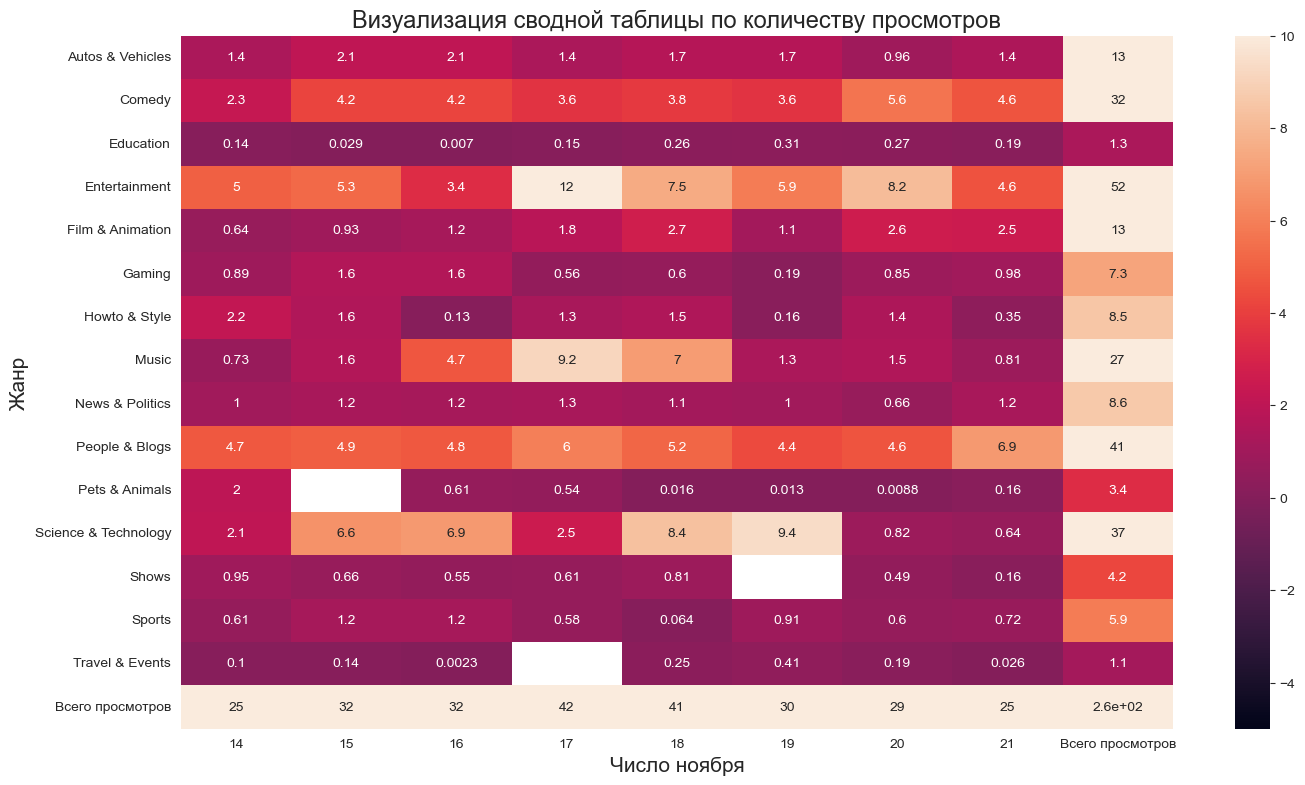

In [26]:
tmp = tmp.apply(lambda x: x / 1e6)

plt.figure(figsize=(16, 9))

sns.heatmap(tmp, annot=True, vmin=-5, vmax=10)
plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Å–≤–æ–¥–Ω–æ–π —Ç–∞–±–ª–∏—Ü—ã –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤', fontdict={'fontsize': 17})
plt.xlabel('–ß–∏—Å–ª–æ –Ω–æ—è–±—Ä—è', fontdict={'fontsize': 15})
plt.ylabel('–ñ–∞–Ω—Ä', fontdict={'fontsize': 15})


plt.show()

In [27]:
data = YouTube2()

/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/var/folders/_7/hjygvl4n3bxbd0nh1_ztt_380000gn/T/ipykernel_53161/4086320967.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

In [28]:
data.task1()

video_id  trending_date  \
0     gDuslQ9avLc             14   
1     AOCJIFEA_jE             14   
2     gknkFwKQfHg             14   
3     TZdNwUSgRHc             14   
4     ss0q7YJ8weU             14   
...           ...            ...   
1516  SFsnUioBIDM             19   
1517  jLZ-MRskz_I             20   
1518  wMN1UiqAaOY             20   
1519  dqGPBMVgVMQ             20   
1520  INrT3kqmVG8             21   

                                                  title  \
0                       –ó–∞—Ö–∞—Ä –∏ –ü–æ–ª–∏–Ω–∞ —É—á–∞—Ç—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å   
1                      –ë–∏—Ä–∂–∞ –ú–µ–º–æ–≤ #29. –ë–æ–ª—å—à–æ–∏ÃÜ –≤—ã–ø—É—Å–∫   
2                            –°–æ—á–Ω–∞—è –∫–µ—Å–∞–¥–∏–ª—å—è —Å –∫—É—Ä–∏—Ü–µ–π   
3     –†–ü–¶ –Ω–µ–∑–∞–∫–æ–Ω–Ω–æ —Å—Ç—Ä–æ–∏—Ç —Ö—Ä–∞–º, –ø–æ–ª–∏—Ü–∏—è —Å–º–æ—Ç—Ä–∏—Ç –∫–∞–∫...   
4         5 –∞–Ω—Ç–∏–õ–ê–ô–§–•–ê–ö–û–í –±–µ–∑ –∫–æ—Ç–æ—Ä—ã—Ö –∂–∏–∑–Ω—å –Ω–µ–≤–æ–∑–º–æ–∂–Ω–∞!   
...                                                 ...   
1516  –ë–µ–∑–¥–æ–º–Ω—ã–µ –∫–æ—Ç—ã –∏ –¥–æ—Å—Ç–æ–ø—Ä–∏–º–µ—á–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –†–∏–º–∞! –û...   
1517   –¢–∞–∏–ª–∞–Ω–¥ –°–∏–º–∏–ª–∞–Ω—ã. –î–∞–π–≤–∏–Ω–≥. –£–ª–∏—Ü–∞ –ö—Ä–∞—Å–Ω—ã—Ö –§–æ–Ω–∞—Ä–µ–π   
1518            –ú–∞–¥—Ä–∏–¥. –û—Ä—ë–ª –∏ –†–µ—à–∫–∞. –ü–µ—Ä–µ–∑–∞–≥—Ä—É–∑–∫–∞. RUS   
1519  üî¥ –ê–®–ê–ù. –ö–†–´–ú. –ß—Ç–æ –Ω–∞ –ø–æ–ª–∫–∞—Ö –≤ –ê—à–∞–Ω–µ? –¶–µ–Ω—ã –≤ –ö—Ä...   
1520  –î–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è –°–≤–µ—Ç—ã –Ω–∞ –ü—Ö—É–∫–µ—Ç–µ - –ø–æ–¥–∞—Ä–∫–∏, –†–æ–∫ ...   

                       channel_title  category_id              publish_time  \
0                          –¢‚Äî–ñ –ë–û–ì–ê–ß           22  2017-11-13T09:09:31.000Z   
1                       Druzhko Show           22  2017-11-13T17:32:11.000Z   
2                           Hochland           22  2017-11-13T06:51:10.000Z   
3         –ù–µ—Ç –∑–∞—Å—Ç—Ä–æ–π–∫–µ –±–µ–∑ —Å–æ–≥–ª–∞—Å–∏—è           22  2017-11-13T06:29:09.000Z   
4                               DIPT           22  2017-11-13T15:49:05.000Z   
...                              ...          ...                       ...   
1516                    –û—Ä–µ–ª –∏ –†–µ—à–∫–∞           19  2017-11-18T13:58:24.000Z   
1517            Alexander Kondrashov           19  2017-11-19T16:22:49.000Z   
1518                    –û—Ä–µ–ª –∏ –†–µ—à–∫–∞           19  2017-11-19T09:28:52.000Z   
1519            –ö–†–´–ú –ì–õ–ê–ó–ê–ú–ò –ú–ï–°–¢–ù–´–•           19  2017-11-19T06:05:58.000Z   
1520  –í–µ—á–Ω–æ–µ –õ–µ—Ç–æ (–ñ–∏–∑–Ω—å –≤ –¢–∞–π–ª–∞–Ω–¥–µ)           19  2017-11-20T09:40:56.000Z   

                                                   tags   views  likes  \
0     –∑–∞—Ö–∞—Ä –∏ –ø–æ–ª–∏–Ω–∞|"—É—á–∏–º—Å—è —ç–∫–æ–Ω–æ–º–∏—Ç—å"|"–∫–æ–ø–∏—Ç—å –¥–µ–Ω—å...   62408    334   
1     –±–∏—Ä–∂–∞ –º–µ–º–æ–≤|"–ª–µ–≤ —à–∞–≥–∏–Ω—è–Ω"|"–º–µ–º—ã"|"–ø–∏–∫—á–∏"|"–¥—Ä—É–∂...  330043  43841   
2     —Ö–æ—Ö–ª–∞–Ω–¥|"—Å—ã—Ä"|"—Ä–µ—Ü–µ–ø—Ç—ã"|"–∫–∞–∫ –ø—Ä–∏–≥–æ—Ç–æ–≤–∏—Ç—å"|"–≤–∫—É...  112851   3566   
3                                                [none]   97006   2259   
4     –ª–∞–π—Ñ—Ö–∞–∫–∏|"–¥–∏–ø—Ç"|"dipt"|"–∞–Ω—Ç–∏–ª–∞–π—Ñ—Ö–∞–∫–∏"|"–ª–∞–π—Ñ—Ö–∞–∫...  148974   5434   
...                                                 ...     ...    ...   
1516  –æ—Ä–µ–ª –∏ —Ä–µ—à–∫–∞ –ø–µ—Ä–µ–∑–∞–≥—Ä—É–∑–∫–∞|"–æ—Ä–µ–ª –∏ —Ä–µ—à–∫–∞ —Ä–∏–º"|"...    9211    325   
1517  –∞–ª–µ–∫—Å–∞–Ω–¥—Ä –∫–æ–Ω–¥—Ä–∞—à–æ–≤|"–ø—É—Ç–µ—à–µ—Å—Ç–≤–∏—è"|"–≤–ª–æ–≥–∏"|"–ø—É—Ç...  135817   5714   
1518  –æ—Ä–µ–ª –∏ —Ä–µ—à–∫–∞ –ø–µ—Ä–µ–∑–∞–≥—Ä—É–∑–∫–∞|"–æ—Ä–µ–ª –∏ —Ä–µ—à–∫–∞ –º–∞–¥—Ä–∏–¥...   44074    883   
1519  –∞—à–∞–Ω|"–∫—Ä—ã–º"|"–ö—Ä—ã–º"|"–ö—Ä—ã–º 2017"|"–ö—Ä—ã–º —Å–µ–≥–æ–¥–Ω—è"|...    6985    306   
1520  –≤–µ—á–Ω–æ–µ –ª–µ—Ç–æ|"—Å–≤–æ–∏–º —Ö–æ–¥–æ–º"|"–°–≤–µ—Ç–ª–∞–Ω–∞ –ë–æ–∂–∏–Ω–∞"|"–±...   26321   1517   

      dislikes  comment_count                                  thumbnail_link  \
0          190             50  https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg   
1         2244           2977  https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg   
2          122             80  https://i.ytimg.com/vi/

In [29]:
data.task2()

trending_date                14         15         16          17         18  \
name                                                                           
Autos & Vehicles      1350890.0  2076443.0  2051608.0   1386676.0  1713087.0   
Comedy                2310887.0  4152389.0  4156893.0   3556025.0  3806238.0   
Education              139723.0    28850.0     6963.0    146943.0   256076.0   
Entertainment         5010384.0  5289490.0  3373346.0  12299938.0  7519942.0   
Film & Animation       636616.0   931837.0  1160112.0   1820958.0  2725012.0   
Gaming                 885597.0  1609621.0  1583149.0    557074.0   600307.0   
Howto & Style         2191619.0  1562421.0   129763.0   1250164.0  1468139.0   
Music                  733907.0  1585619.0  4720464.0   9179397.0  6972429.0   
News & Politics       1010044.0  1225112.0  1174092.0   1251367.0  1056007.0   
People & Blogs        4740267.0  4931179.0  4763680.0   5976118.0  5154219.0   
Pets & Animals        2013597.0        NaN   608073.0    541708.0    16179.0   
Science & Technology  2053694.0  6637302.0  6855094.0   2521015.0  8351102.0   
Shows                  951608.0   656799.0   548936.0    609770.0   808860.0   
Sports                 608587.0  1181720.0  1193647.0    577087.0    64261.0   
Travel & Events        104076.0   136549.0     2271.0         NaN   253369.0   

trending_date                19         20         21  
name                                                   
Autos & Vehicles      1736740.0   962761.0  1421017.0  
Comedy                3556578.0  5648120.0  4627423.0  
Education              310830.0   270585.0   186909.0  
Entertainment         5877590.0  8174020.0  4585563.0  
Film & Animation      1075440.0  2574276.0  2532978.0  
Gaming                 193316.0   851814.0   981217.0  
Howto & Style          156958.0  1402284.0   350009.0  
Music                 1329904.0  1527219.0   809274.0  
News & Politics       1028665.0   657263.0  1214178.0  
People & Blogs        4353670.0  4628820.0  6889111.0  
Pets & Animals          12928.0     8792.0   164127.0  
Science & Technology  9396340.0   818570.0   638900.0  
Shows                       NaN   491488.0   164981.0  
Sports                 911646.0   600913.0   722192.0  
Travel & Events        406558.0   186876.0    26321.0

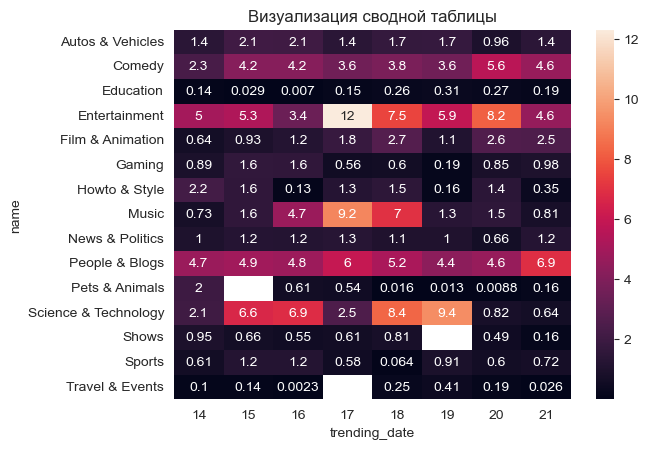

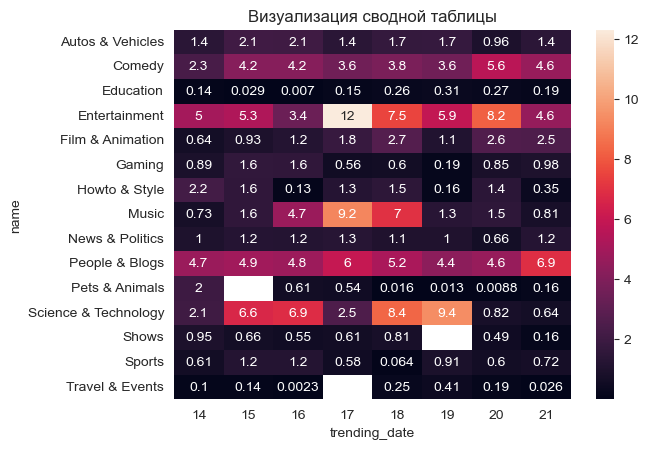

In [30]:
data.task3()

In [31]:
data.task4()

trending_date                 14          15          16          17  \
name                                                                   
Autos & Vehicles       1350890.0   2076443.0   2051608.0   1386676.0   
Comedy                 2310887.0   4152389.0   4156893.0   3556025.0   
Education               139723.0     28850.0      6963.0    146943.0   
Entertainment          5010384.0   5289490.0   3373346.0  12299938.0   
Film & Animation        636616.0    931837.0   1160112.0   1820958.0   
Gaming                  885597.0   1609621.0   1583149.0    557074.0   
Howto & Style          2191619.0   1562421.0    129763.0   1250164.0   
Music                   733907.0   1585619.0   4720464.0   9179397.0   
News & Politics        1010044.0   1225112.0   1174092.0   1251367.0   
People & Blogs         4740267.0   4931179.0   4763680.0   5976118.0   
Pets & Animals         2013597.0         NaN    608073.0    541708.0   
Science & Technology   2053694.0   6637302.0   6855094.0   2521015.0   
Shows                   951608.0    656799.0    548936.0    609770.0   
Sports                  608587.0   1181720.0   1193647.0    577087.0   
Travel & Events         104076.0    136549.0      2271.0         NaN   
–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤      24741496.0  32005331.0  32328091.0  41674240.0   

trending_date                 18          19          20          21  \
name                                                                   
Autos & Vehicles       1713087.0   1736740.0    962761.0   1421017.0   
Comedy                 3806238.0   3556578.0   5648120.0   4627423.0   
Education               256076.0    310830.0    270585.0    186909.0   
Entertainment          7519942.0   5877590.0   8174020.0   4585563.0   
Film & Animation       2725012.0   1075440.0   2574276.0   2532978.0   
Gaming                  600307.0    193316.0    851814.0    981217.0   
Howto & Style          1468139.0    156958.0   1402284.0    350009.0   
Music                  6972429.0   1329904.0   1527219.0    809274.0   
News & Politics        1056007.0   1028665.0    657263.0   1214178.0   
People & Blogs         5154219.0   4353670.0   4628820.0   6889111.0   
Pets & Animals           16179.0     12928.0      8792.0    164127.0   
Science & Technology   8351102.0   9396340.0    818570.0    638900.0   
Shows                   808860.0         NaN    491488.0    164981.0   
Sports                   64261.0    911646.0    600913.0    722192.0   
Travel & Events         253369.0    406558.0    186876.0     26321.0   
–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤      40765227.0  30347163.0  28803801.0  25314200.0   

trending_date         –í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤  
name                                    
Autos & Vehicles            12699222.0  
Comedy                      31814553.0  
Education                    1346879.0  
Entertainment               52130273.0  
Film & Animation            13457229.0  
Gaming                       7262095.0  
Howto & Style                8511357.0  
Music                       26858213.0  
News & Politics              8616728.0  
People & Blogs              41437064.0  
Pets & Animals               3365404.0  
Science & Technology        37272017.0  
Shows                        4232442.0  
Sports                       5860053.0  
Travel & Events              1116020.0  
–í—Å–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤           255979549.0

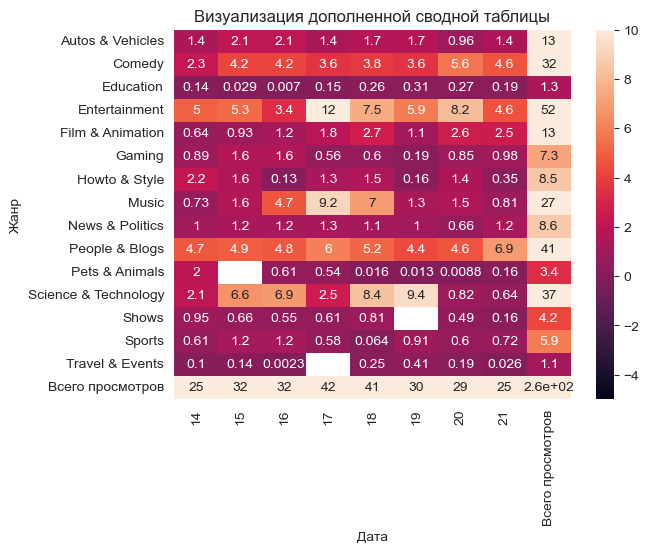

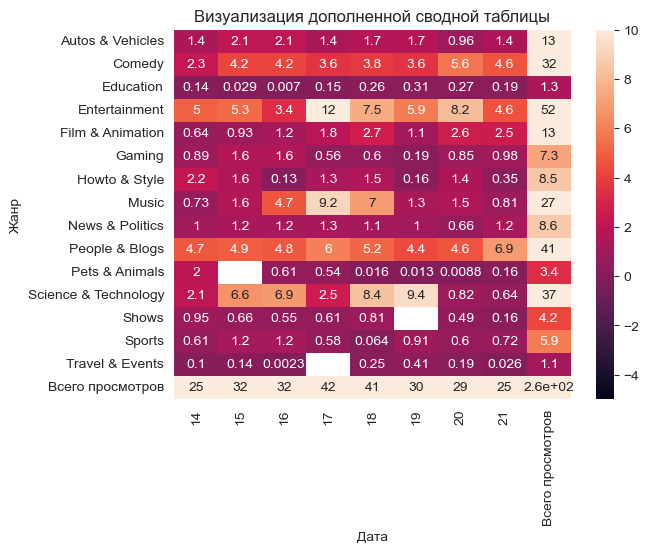

In [32]:
data.task5()

In [ ]:
data